### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

### Load and Prepare the Data

In [2]:
data = pd.read_csv("C:/Users/muge/Dropbox/GMU/Portfolio/AIT 580/Movies/cleaned_movies_data.csv")

In [3]:
data.columns

Index(['Title', 'US Gross', 'Worldwide Gross', 'US DVD Sales',
       'Production Budget', 'Release Date', 'MPAA Rating',
       'Running Time (min)', 'Distributor', 'Source', 'Major Genre',
       'Creative Type', 'Director', 'Rotten Tomatoes Rating', 'IMDB Rating',
       'IMDB Votes', 'Release Year', 'Profit', 'ROI'],
      dtype='object')

In [4]:
# Select relevant columns
features = ['Major Genre', 'Director', 'Running Time (min)', 'IMDB Rating']

# Drop rows with missing values
data = data.dropna(subset=features)

# One-hot encode categorical features (Genre, Director)
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_features = encoder.fit_transform(data[['Major Genre', 'Director']])

# Standardize numerical features (Running Time, IMDB Rating, Metascore)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Running Time (min)', 'IMDB Rating']])

# Combine encoded and scaled features
X = np.hstack((encoded_features, scaled_features))

#### 1. Determine Optimal Number of Clusters (Elbow Method)

We use the Elbow Method to determine the best number of clusters for K-means.

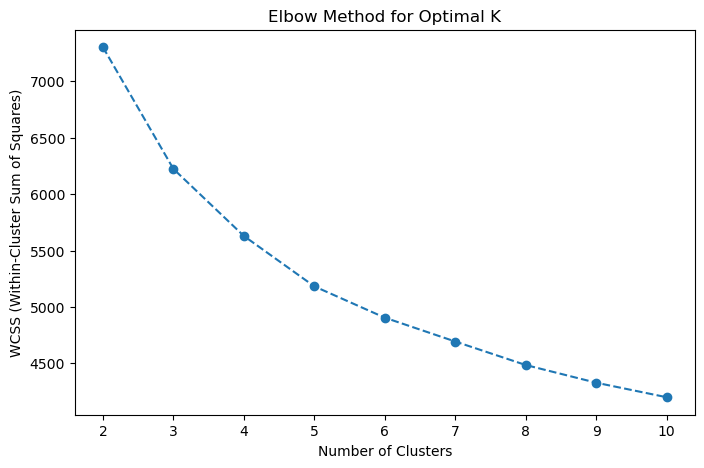

In [5]:
wcss = []  # Within-cluster sum of squares

for k in range(2, 11):  # Checking for k=2 to k=10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

This chart depicts the Elbow Method used to determine the optimal number of clusters (K) for K-Means clustering. Let's break down the interpretation:

Understanding the Elbow Method:
* Purpose: The Elbow Method is a heuristic approach used to find the best value for K in K-Means clustering. It plots the Within-Cluster Sum of Squares (WCSS) against the number of clusters (K).
* WCSS: WCSS measures the sum of squared distances between each point and the centroid of its assigned cluster. Lower WCSS values indicate tighter, more compact clusters.
* Elbow Point: The "elbow point" is the point on the graph where the rate of decrease in WCSS sharply changes. It represents a trade-off between minimizing WCSS and having a manageable number of clusters.

Interpretation:
* Decreasing WCSS: As the number of clusters increases, the WCSS generally decreases. This is expected because with more clusters, data points are closer to their cluster centroids.
* Elbow Point Around K=4 or K=5: The rate of decrease in WCSS is steep initially, but it starts to level off around K=4 or K=5. This suggests that there might be an "elbow point" in this region.
* Optimal K: The "elbow point" is where adding more clusters provides diminishing returns in terms of reducing WCSS. In this case, the optimal number of clusters would likely be 4 or 5.

How to Choose Between K=4 and K=5:
* Further Analysis: The Elbow Method provides a general guideline, but it's not always definitive. We might need to perform further analysis to decide between K=4 and K=5.
* Domain Knowledge: Consider the context of our data and what the clusters represent. Domain knowledge can help us decide which value of K makes more practical sense.
* Silhouette Score: Calculate the silhouette score for both K=4 and K=5. The silhouette score measures how similar an object is to its own cluster compared to other clusters. Higher silhouette scores indicate better clustering.1   

This Elbow Method chart suggests that the optimal number of clusters for our K-Means clustering is likely 4 or 5. Further analysis and domain knowledge can help us make a final decision.

#### 2. Apply K-Means Clustering

After selecting the best k from the elbow method, we apply K-Means.

In [6]:
# Apply K-means clustering
optimal_k = 4  # Example: choose k=4 based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X)

# Display cluster counts
print(data['Cluster'].value_counts())

1    1359
3     744
0     261
2     180
Name: Cluster, dtype: int64


* Uneven Cluster Sizes: The clusters have significantly different sizes. Cluster 1 is the largest, containing 1359 data points, while cluster 2 is the smallest, containing only 180 data points.
* Cluster 1 Dominance: Cluster 1 represents a large portion of our dataset, more than half of the data points.
* Cluster 3 Moderate Size: Cluster 3 has a moderate size, containing 744 data points.
* Clusters 0 and 2 Small: Clusters 0 and 2 are relatively small, containing 261 and 180 data points, respectively.

Possible Implications and Further Analysis:
* Cluster Imbalance: The uneven cluster sizes might indicate that some clusters represent more common or dominant patterns in our data, while others represent less frequent or outlier patterns.
* Feature Analysis: we should analyze the characteristics of the data points within each cluster to understand what differentiates them. For example, we can calculate the mean and standard deviation of each feature for each cluster.
* Visualization: Visualize the clusters in a 2D or 3D space (if possible) to see how they are distributed and to identify any patterns.
* Domain Knowledge: Use domain knowledge to interpret the meaning of the clusters and to determine if they make sense in the context of the data.
* Silhouette Score (Again): we can use the silhouette score to evaluate the quality of the clustering. While we've chosen K=4 based on the elbow method, it's still good to check the silhouette score for this specific clustering result.

The results show that our K-Means clustering with K=4 has created clusters with significantly different sizes, with cluster 1 being the largest. Further analysis is needed to understand the characteristics of each cluster and to evaluate the quality of the clustering.

#### 3. Visualizing Clusters Using PCA

Since our data is high-dimensional (due to one-hot encoding), we use PCA (Principal Component Analysis) to reduce it to 2D for visualization.

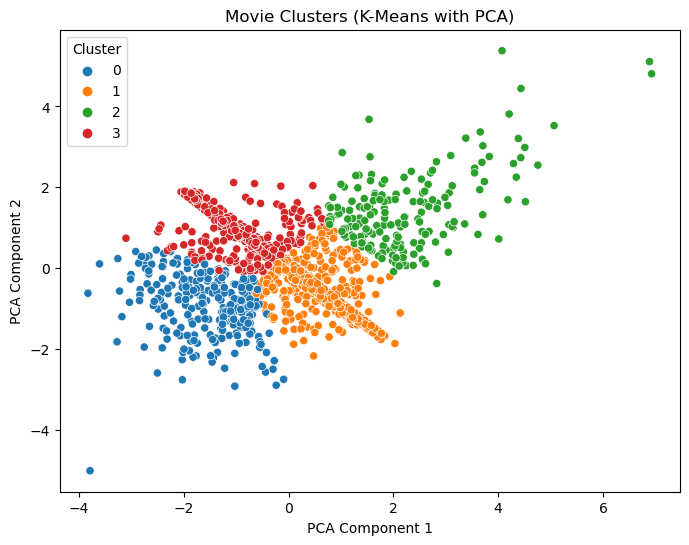

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['Cluster'], palette='tab10')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Movie Clusters (K-Means with PCA)")
plt.legend(title="Cluster")
plt.show()

This chart visualizes the results of K-Means clustering applied to movie data, with dimensionality reduction performed using Principal Component Analysis (PCA). Let's break down the interpretation:

Understanding the Chart:
* X-axis: PCA Component 1: Represents the first principal component, capturing the most variance in the original data.
* Y-axis: PCA Component 2: Represents the second principal component, capturing the second most variance.
* Data Points: Each point represents a movie, plotted based on its projection onto the first two principal components.
* Color Coding: The color of each point indicates its assigned cluster from the K-Means algorithm (0, 1, 2, or 3).

Interpretation:
* Dimensionality Reduction: PCA has reduced the original high-dimensional movie data into a 2D space, making it easier to visualize the clusters.
* Cluster Separation: The chart shows a reasonable degree of separation between the clusters.
* Cluster 0 (Blue): Appears to be a relatively dense cluster in the lower left quadrant.
* Cluster 1 (Orange): Forms a cluster in the center, overlapping slightly with other clusters.
* Cluster 2 (Green): Forms a cluster in the upper right quadrant, indicating movies with different characteristics compared to the others.
* Cluster 3 (Red): Forms a cluster in the upper left quadrant.
* Overlap: While there is separation, there is also some overlap between the clusters, particularly between cluster 1 and the others. This suggests that the clusters are not perfectly distinct.
* Outliers: There are a few data points that are far from the main clusters, especially the single point in the bottom left and the two points in the upper right. These could be outliers in the original data.
* Variance Captured: The chart shows the data projected onto the first two principal components. The amount of variance captured by these components is not stated on the chart. If the first two components capture a significant portion of the total variance, then this visualization is a good representation of the data. If not, then some information may have been lost during dimensionality reduction.

Key Takeaways:
* Visual Confirmation of Clustering: The chart provides a visual confirmation of the K-Means clustering results.
* Cluster Characteristics: By analyzing the location of the clusters in the PCA space, we can infer the characteristics of the movies within each cluster. For example, movies in cluster 2 (green) likely have higher values for the features that contribute most to PCA Component 1 and PCA Component 2.
* Potential for Further Analysis: This visualization can be used as a starting point for further analysis, such as investigating the features that contribute most to the principal components and understanding the differences between the clusters.

This chart shows a successful application of K-Means clustering with PCA dimensionality reduction. The clusters are reasonably well-separated, and the chart provides a visual representation of the different groups of movies identified by the clustering algorithm.

#### 4. Hierarchical Clustering (Dendrogram)

For Hierarchical Clustering, we can generate a dendrogram to see how movies are related.

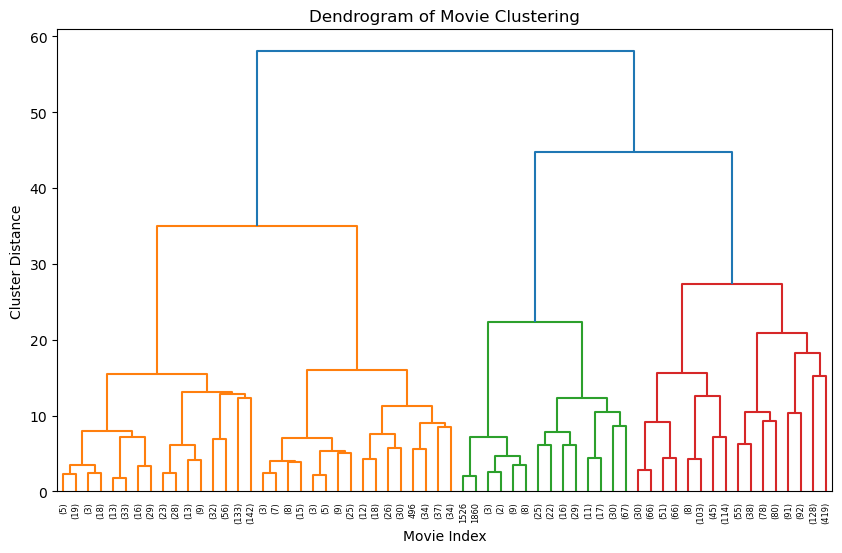

In [8]:
# Perform hierarchical clustering
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, labels=data.index, truncate_mode='level', p=5)  # Show top 5 levels
plt.title("Dendrogram of Movie Clustering")
plt.xlabel("Movie Index")
plt.ylabel("Cluster Distance")
plt.show()

This chart is a dendrogram, which is a visualization of the results of hierarchical clustering. 

Understanding Dendrograms:
* Purpose: Dendrograms show the hierarchical relationships between data points, illustrating how they are grouped into clusters at different levels of similarity.
* X-axis: Movie Index: Represents the individual movie data points. Each index number corresponds to a specific movie.
* Y-axis: Cluster Distance (or Dissimilarity): Represents the distance or dissimilarity between clusters. Higher values indicate that clusters are less similar.
* U-shaped Links: The U-shaped links connect data points or clusters. The height of the link indicates the distance at which the clusters are merged.
* Cluster Formation: Clusters are formed by cutting the dendrogram at a specific distance threshold. The vertical lines below the cut point represent the data points or sub-clusters that belong to that cluster.

Interpreting This Dendrogram:
* Movie Index: The x-axis shows the index of each movie. The numbers in parentheses at the bottom likely represent the number of movies in a sub-cluster or a count related to the data.
* Cluster Distance: The y-axis shows the distance between clusters.  Higher distances mean the clusters are less similar.

Hierarchical Structure:
* Bottom-Up: The dendrogram is built from the bottom up, starting with individual movies and merging them into increasingly larger clusters.
* Branching: The branching pattern shows how movies are grouped together at different levels of similarity.

Cluster Formation:
* Choosing a Threshold: To determine the number of clusters, we choose a distance threshold (a horizontal cut-off line).
* Example: If we cut the dendrogram at a distance of around 45, we would get four main clusters, represented by the four distinct vertical groupings (orange, green, dark blue, and red).
* Lower Threshold: If we cut at a lower threshold (e.g., around 20), we would get more clusters.

Cluster Interpretation:
* Similarity: Movies within the same branch or sub-cluster are more similar to each other than movies in different branches.
* Distance and Dissimilarity: The height of the links indicates the dissimilarity between clusters. Higher links mean less similar clusters.

Observations:
* Four Main Clusters: The most prominent pattern suggests four main clusters based on a cut around a distance of 45.
* Sub-Clusters: Within each main cluster, there are sub-clusters, showing finer-grained relationships between movies.
* Outliers: Movies that merge at higher distances might be considered outliers, as they are less similar to the other movies.

How to Use This Dendrogram:
* Determine the Number of Clusters: Choose an appropriate distance threshold to define the clusters based on the analysis goals.
* Understand Cluster Relationships: Analyze the branching pattern to understand how movies are grouped and the relationships between clusters.
* Identify Potential Outliers: Look for movies that merge at high distances.
* Further Analysis: Use the clusters identified by the dendrogram as a basis for further analysis, such as comparing the characteristics of movies in different clusters.

This dendrogram provides a visual representation of hierarchical clustering, showing how movies are grouped together at different levels of similarity. By choosing an appropriate distance threshold, we can determine the number of clusters and gain insights into the relationships between movies.

#### 5. Cluster Analysis: Feature Importance

We analyze which features influence clustering the most.

In [9]:
# Group movies by cluster and calculate average feature values
cluster_summary = data.groupby("Cluster")[['Running Time (min)', 'IMDB Rating']].mean()
print(cluster_summary)

         Running Time (min)  IMDB Rating
Cluster                                 
0                 89.957854     5.832950
1                107.149375     6.973804
2                132.066667     6.945556
3                106.932796     5.146237


Cluster 0 (Shortest, Moderate Rating):
* Movies in cluster 0 have the shortest average running time (approximately 90 minutes).
* They have a moderate average IMDB rating (approximately 5.8).

Cluster 1 (Moderate Length, Highest Rating):
* Movies in cluster 1 have a moderate average running time (approximately 107 minutes).
* They have the highest average IMDB rating (approximately 7.0).

Cluster 2 (Longest, High Rating):
* Movies in cluster 2 have the longest average running time (approximately 132 minutes).
* They have a high average IMDB rating (approximately 6.9), similar to cluster 1.

Cluster 3 (Moderate Length, Lowest Rating):
* Movies in cluster 3 have a moderate average running time (approximately 107 minutes), similar to cluster 1.
* They have the lowest average IMDB rating (approximately 5.1).

Possible Implications and Further Analysis:
* Cluster Characteristics: The results suggest that the clusters represent different types of movies based on their length and rating.
    * Cluster 0 might represent shorter, less critically acclaimed movies.
    * Clusters 1 and 2 might represent longer, more highly rated movies.
    * Cluster 3 might represent movies of moderate length but with lower ratings.
* Feature Importance: These features ('Running Time (min)' and 'IMDB Rating') appear to be important in distinguishing the clusters.
* Further Feature Analysis: We should analyze the average values of other features within each cluster to get a more complete understanding of their characteristics.
* Domain Knowledge: Use domain knowledge to interpret the meaning of these clusters. For example, we might find that cluster 2 represents epic films or award-winning movies.
* Consider Other Metrics: we could also calculate other metrics, such as the median, standard deviation, or quartiles for each feature within each cluster.

The results show that the clusters have distinct characteristics based on their average running time and IMDB rating. This suggests that the K-Means clustering has successfully identified different groups of movies with varying lengths and ratings.